In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('crop-yield.csv')
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N                           10000 non-null  int64  
 1   P                           10000 non-null  int64  
 2   K                           10000 non-null  int64  
 3   Soil_pH                     10000 non-null  float64
 4   Soil_Moisture               10000 non-null  float64
 5   Soil_Type                   10000 non-null  object 
 6   Organic_Carbon              10000 non-null  float64
 7   Temperature                 10000 non-null  float64
 8   Humidity                    10000 non-null  float64
 9   Rainfall                    10000 non-null  float64
 10  Sunlight_Hours              10000 non-null  float64
 11  Wind_Speed                  10000 non-null  float64
 12  Region                      10000 non-null  object 
 13  Altitude                    1000

In [4]:
df.duplicated().sum()

np.int64(0)

## EDA for feature selection

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
corr = df.corr(numeric_only=True)
corr

,N,P,K,Soil_pH,Soil_Moisture,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Altitude,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
N,1.000000,0.005533,-0.006166,0.007986,0.011550,0.010804,0.002322,0.007482,0.007888,-0.007339,0.004930,0.003880,0.010153,-0.000861,0.002334
P,0.005533,1.000000,-0.004304,-0.004621,-0.015392,0.010566,-0.001248,0.005704,-0.000457,0.026856,0.008617,0.009788,0.004610,-0.008628,-0.002483
K,-0.006166,-0.004304,1.000000,-0.001930,0.009864,-0.008846,0.011868,0.010564,-0.005509,-0.000492,0.003925,-0.003673,0.008445,-0.003456,0.009897
Soil_pH,0.007986,-0.004621,-0.001930,1.000000,-0.005134,0.005676,-0.000429,0.000018,0.001366,-0.001607,-0.000314,-0.001439,0.000290,0.011209,-0.010509
Soil_Moisture,0.011550,-0.015392,0.009864,-0.005134,1.000000,0.000630,-0.006193,-0.012790,-0.006895,-0.007630,0.000661,0.008936,-0.008293,0.008485,0.000152
Organic_Carbon,0.010804,0.010566,-0.008846,0.005676,0.000630,1.000000,-0.022291,0.000826,-0.009739,-0.003171,0.013330,0.022276,-0.001069,-0.001418,-0.000781
Temperature,0.002322,-0.001248,0.011868,-0.000429,-0.006193,-0.022291,1.000000,-0.008862,-0.005747,0.000798,-0.010281,0.003325,-0.012319,0.009531,-0.006589
Humidity,0.007482,0.005704,0.010564,0.000018,-0.012790,0.000826,-0.008862,1.000000,0.012658,0.021042,-0.002977,-0.002748,-0.009715,-0.001629,0.006916
Rainfall,0.007888,-0.000457,-0.005509,0.001366,-0.006895,-0.009739,-0.005747,0.012658,1.000000,-0.001289,-0.014392,-0.000546,0.018513,-0.007375,0.031213
Sunlight_Hours,-0.007339,0.026856,-0.000492,-0.001607,-0.007630,-0.003171,0.000798,0.021042,-0.001289,1.000000,-0.003318,0.016818,-0.008959,-0.002348,-0.001162


<Axes: >

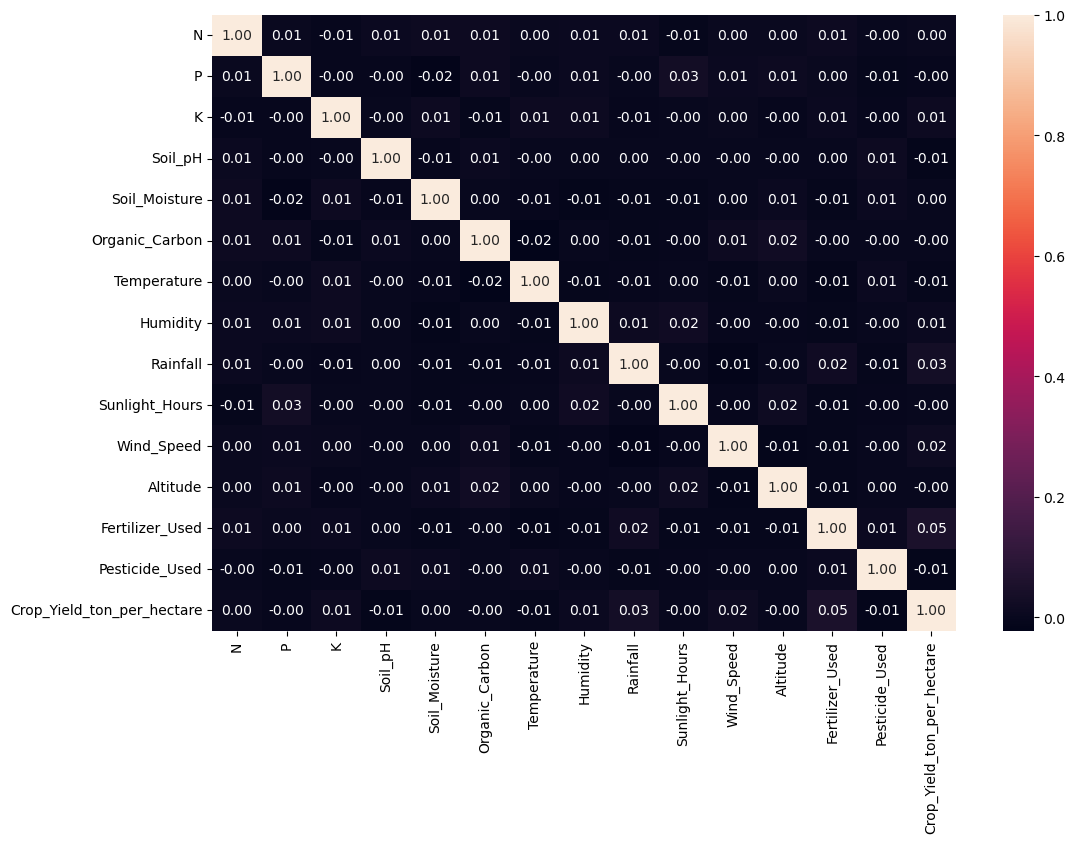

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, annot=True, fmt='.2f')

In [8]:
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


<Axes: xlabel='Season', ylabel='Crop_Yield_ton_per_hectare'>

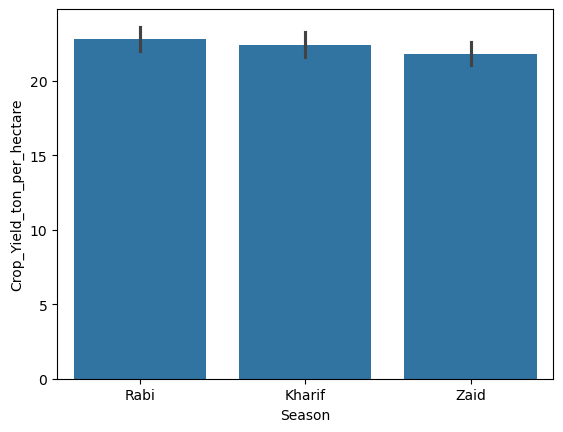

In [9]:
sns.barplot(data=df, x='Season' , y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='Region', ylabel='Crop_Yield_ton_per_hectare'>

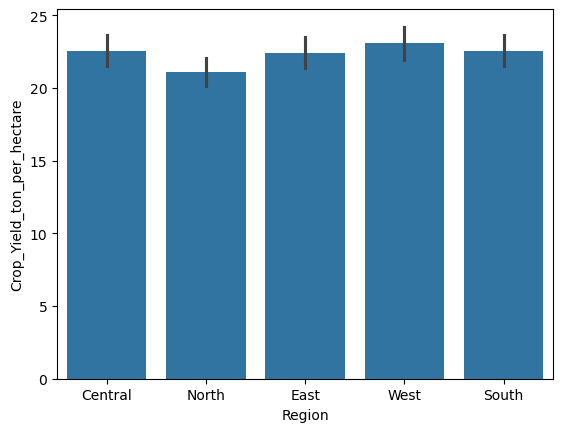

In [10]:
sns.barplot(data=df, x='Region' , y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='Soil_Type', ylabel='Crop_Yield_ton_per_hectare'>

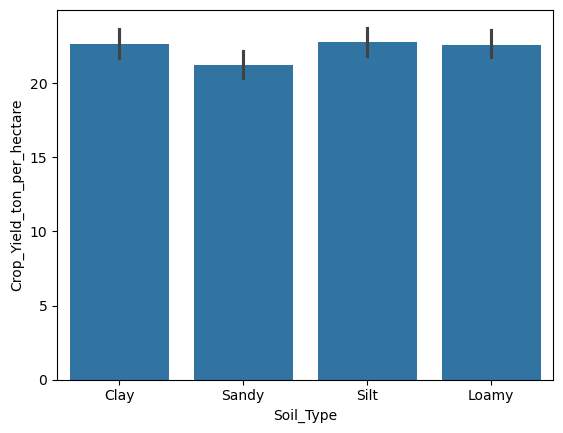

In [11]:
sns.barplot(data=df, x='Soil_Type' , y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='Crop_Type', ylabel='Crop_Yield_ton_per_hectare'>

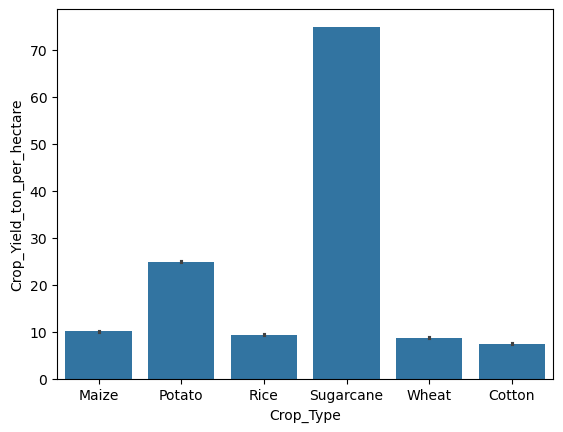

In [12]:
sns.barplot(data=df, x='Crop_Type' , y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='Irrigation_Type', ylabel='Crop_Yield_ton_per_hectare'>

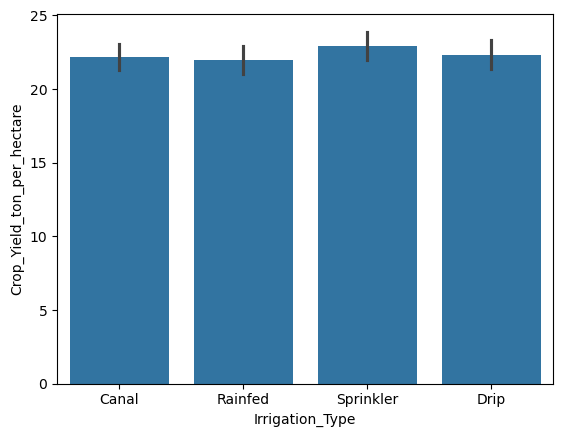

In [13]:
sns.barplot(data=df, x='Irrigation_Type' , y='Crop_Yield_ton_per_hectare')

In [14]:
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


<Axes: xlabel='N', ylabel='Crop_Yield_ton_per_hectare'>

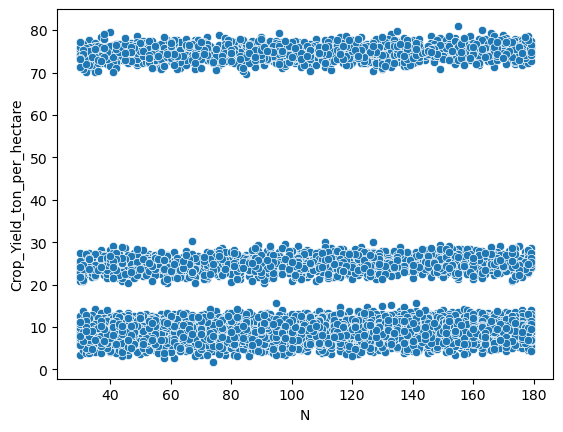

In [15]:
sns.scatterplot(data=df, x='N',y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='P', ylabel='Crop_Yield_ton_per_hectare'>

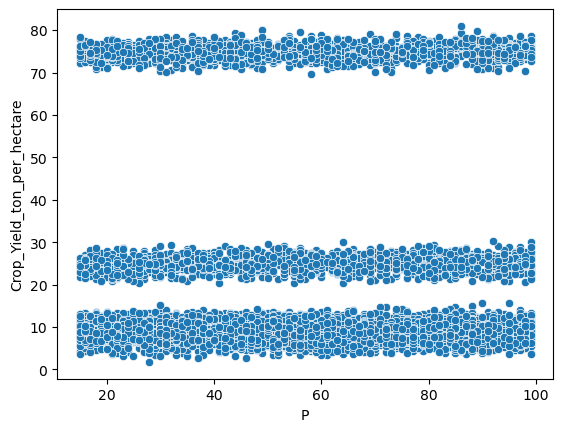

In [16]:
sns.scatterplot(data=df, x='P',y='Crop_Yield_ton_per_hectare')

<Axes: xlabel='K', ylabel='Crop_Yield_ton_per_hectare'>

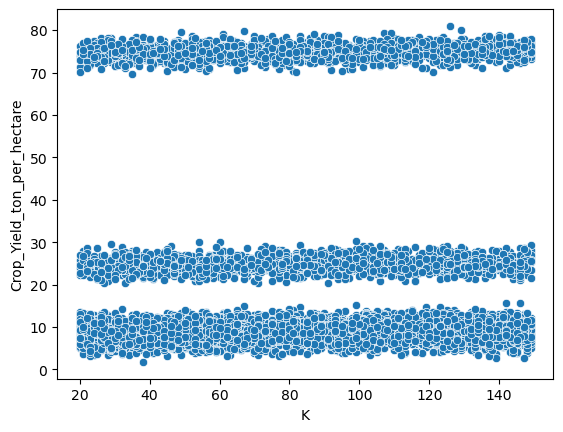

In [17]:
sns.scatterplot(data=df, x='K',y='Crop_Yield_ton_per_hectare')

### From above grpahs we know target is distributed in 3 categories, Low(5-15) , medium(20-30) , high(70-80) Yield

In [18]:
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,8.75,5.49,East,765,Kharif,Sugarcane,Rainfed,274.02,2.72,72.53
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72


## Data Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train , test = train_test_split(df, test_size=0.2, random_state=42)
train.shape


(8000, 20)

In [21]:
test.shape

(2000, 20)

In [22]:
train_X = train.drop(columns='Crop_Yield_ton_per_hectare')
test_X = test.drop(columns='Crop_Yield_ton_per_hectare')

train_y = train['Crop_Yield_ton_per_hectare']
test_y = test['Crop_Yield_ton_per_hectare']


In [23]:
train_X.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used
9254,97,65,111,6.63,33.64,Loamy,1.13,14.20,83.41,353.04,9.67,5.94,East,134,Rabi,Cotton,Canal,173.60,12.74
1561,160,15,31,6.50,22.08,Sandy,0.40,28.80,48.37,438.86,7.27,3.77,West,1245,Kharif,Wheat,Canal,101.87,6.87
1670,68,20,121,5.26,24.35,Silt,1.30,22.50,87.87,325.23,10.40,11.92,Central,111,Zaid,Wheat,Drip,221.68,13.94
6087,71,93,99,6.65,33.66,Sandy,0.40,21.41,64.37,2006.21,10.21,4.50,North,764,Rabi,Cotton,Canal,348.58,0.31
6669,132,29,69,7.67,62.86,Clay,0.80,37.31,33.20,549.45,7.78,13.02,South,1880,Kharif,Rice,Drip,149.07,20.64


In [24]:
num_vars = train_X.select_dtypes(include='number').columns
cat_vars = train_X.select_dtypes(include='O').columns

In [63]:
num_vars

Index(['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Organic_Carbon',
       'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed',
       'Altitude', 'Fertilizer_Used', 'Pesticide_Used'],
      dtype='object')

## Preprocessing

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [26]:
num_pipe = Pipeline([('impute',SimpleImputer(strategy='median')),('scale',StandardScaler())])

In [27]:
cat_pipe = Pipeline([('impute',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
preprocess_pipe = ColumnTransformer([('numeric data',num_pipe,num_vars),('categorical data',cat_pipe,cat_vars)])

In [30]:
train_X_tr = pd.DataFrame(preprocess_pipe.fit_transform(train_X))
train_X_tr

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.176558,0.339287,0.684479,0.125399,-0.441396,0.455768,-1.243978,1.357015,-1.662139,1.079972,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.280022,-1.700710,-1.445657,-0.007566,-1.240307,-1.489594,0.422056,-0.660987,-1.542623,-0.116295,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.847048,-1.496711,0.950746,-1.275853,-1.083428,0.908797,-0.296849,1.613873,-1.700868,1.443836,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.777687,1.481686,0.364959,0.145856,-0.440014,-1.489594,-0.421231,0.260475,0.640122,1.349132,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.632653,-1.129511,-0.433842,1.189123,1.577999,-0.423643,1.393149,-1.534649,-1.388612,0.137911,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.355695,-1.211111,0.844240,-1.511099,0.859946,-0.929970,0.144764,-0.641982,-0.790155,1.553494,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7996,1.095060,-0.068712,-0.833243,1.209580,1.234522,1.601666,-0.157632,0.366443,-1.441852,-1.078293,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7997,-0.777687,1.685686,1.270267,0.647033,-1.366779,-0.636833,0.277134,-1.576691,-0.805558,-1.352438,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7998,0.308969,0.420887,0.631226,-0.232585,-0.345333,-0.956618,-1.723248,-1.251875,1.497051,1.678105,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
test_X_tr = pd.DataFrame(preprocess_pipe.transform(test_X))
test_X_tr

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.262728,1.318486,-0.433842,0.933421,0.499883,-1.622838,0.865952,-1.715486,1.031146,1.010189,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.962650,-0.843911,0.551346,1.567564,1.477789,-1.143160,0.699348,1.446858,-1.617324,-0.001653,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.285848,-0.231912,-0.939750,1.107299,0.921454,0.269226,-0.297990,0.138957,-1.670801,1.154738,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.107197,0.380087,-0.034442,0.810683,0.432846,0.455768,-0.416666,-1.015175,1.654447,-1.432189,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.303143,1.685686,-1.285897,0.503840,-1.578946,0.615660,1.085046,-0.474967,-0.770770,0.451932,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.193367,0.951287,-0.540349,1.209580,-1.576873,-1.276404,-0.442912,0.498903,-1.512877,0.287445,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1996,0.470811,1.563286,-0.753363,-0.733763,-0.059909,0.269226,-0.716781,-0.655804,-0.539885,-0.963651,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1997,0.124006,-1.619110,0.364959,0.156084,1.680281,1.121987,-0.186160,1.324188,-0.579004,1.433867,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,1.210661,0.012888,-1.099510,1.219808,-0.087553,0.908797,-0.861703,0.679164,-1.071189,0.746014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## cross validation with pipeline...as we have used pipiline for preprocessing...

In [33]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict 

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [53]:
kf = KFold(shuffle=True, random_state=42)

def kfold(model, X, y, cv):
    fold_pipe = Pipeline([('prep',preprocess_pipe),('model',model)])
    scores = cross_val_score(estimator=fold_pipe, X=X, y=y, scoring='r2', n_jobs=-1, cv=cv)

    print(f'Scores of each fold : {scores}\n')
    print(f'Average Score : {scores.mean()}\n')

    y_pred = cross_val_predict(estimator=fold_pipe, X=X, y=y, n_jobs=-1, cv=cv)
    r2 = r2_score(y, y_pred)
    mae =  mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    print(f'Mean Squared Error : {mse}')
    print(f'Root_mean_squared_error : {np.sqrt(mse)}\n')
    print(f'Mean Abolute Error : {mae}\n')
    print(f'R2 Score : {r2}')

In [43]:
# importing models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:
kfold(LinearRegression(), train_X, train_y, kf)

Scores of each fold : [0.99793961 0.99789813 0.99784243 0.99806518 0.99786591]

Average Score : 0.9979222505333339

Mean Squared Error : 1.1896340927120352
Root_mean_squared_error : 1.0907034852387862

Mean Abolute Error : 0.8750012572705754

R2 Score : 0.9979251960258576


In [55]:
kfold(RandomForestRegressor(), train_X, train_y, kf)

Scores of each fold : [0.99780821 0.9976847  0.99751221 0.99791389 0.99772525]

Average Score : 0.9977288519426473

Mean Squared Error : 1.3005808864825
Root_mean_squared_error : 1.140430132223145

Mean Abolute Error : 0.909672325

R2 Score : 0.9977316971592367


In [56]:
kfold(XGBRegressor(), train_X, train_y, kf)

Scores of each fold : [0.99783468 0.99767138 0.9975932  0.99792145 0.99766512]

Average Score : 0.9977371656916889

Mean Squared Error : 1.2950146371103168
Root_mean_squared_error : 1.1379870988329863

Mean Abolute Error : 0.9114878609418868

R2 Score : 0.9977414050823614


## Looking at MSE,RMSE and MAE Linear Regression looks best

In [57]:
model = LinearRegression()

### this model doesn't need hyperparameter tuning..

LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)

In [58]:
# as we have used pipeline for preprocesssing...we use it again for model itself...

final_pipe = Pipeline([('prep',preprocess_pipe),('model',model)])

final_pipe.fit(train_X, train_y)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric data', ...), ('categorical data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
y_pred = final_pipe.predict(test_X)
y_pred

array([10.38225088,  8.79984452, 23.8245346 , ..., 74.41976854,
        5.68549257, 24.67184609])

In [60]:
r2 = r2_score(test_y, y_pred)
mae =  mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)

print(f'Mean Squared Error : {mse}')
print(f'Root_mean_squared_error : {np.sqrt(mse)}\n')
print(f'Mean Abolute Error : {mae}\n')
print(f'R2 Score : {r2}')

Mean Squared Error : 1.1685343433282664
Root_mean_squared_error : 1.0809876702942853

Mean Abolute Error : 0.8637882165225111

R2 Score : 0.9979952320823082


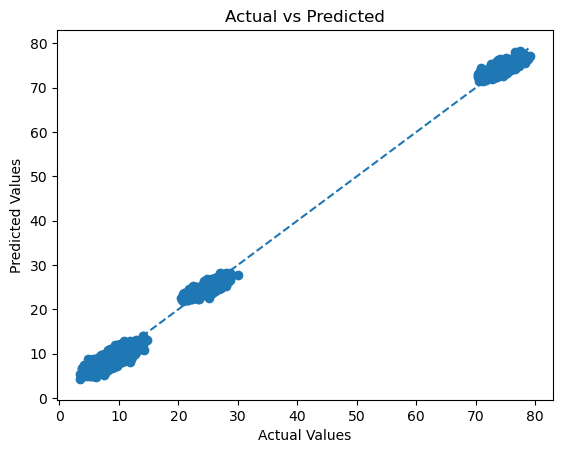

In [62]:
plt.figure()
plt.scatter(test_y, y_pred)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
